<a href="https://colab.research.google.com/github/arbin34/heruko/blob/main/joblib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv')
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [ ]:

df.rename(columns={'Month':'ds','Sales':'y'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      108 non-null    object
 1   y       108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [ ]:
df_new=df[['ds','y']]

In [ ]:
x=df['ds'].values
x

array(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
       '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12',
       '1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
       '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
       '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
       '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
       '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
       '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12',
       '1964-01', '1964-02', '1964-03', '1964-04', '1964-05', '1964-06',
       '1964-07', '1964-08', '1964-09', '1964-10', '1964-11', '1964-12',
       '1965-01', '1965-02', '1965-03', '1965-04', '1965-05', '1965-06',
       '1965-07', '1965-08', '1965-09', '1965-10', '1965-11', '1965-12',
       '1966-01', '1966-02', '1966-03', '1966-04', '1966-05', '1966-06',
       '1966-07', '1966-08', '1966-09', '1966-10', 

In [ ]:
y=df['y'].values
y

array([ 6550,  8728, 12026, 14395, 14587, 13791,  9498,  8251,  7049,
        9545,  9364,  8456,  7237,  9374, 11837, 13784, 15926, 13821,
       11143,  7975,  7610, 10015, 12759,  8816, 10677, 10947, 15200,
       17010, 20900, 16205, 12143,  8997,  5568, 11474, 12256, 10583,
       10862, 10965, 14405, 20379, 20128, 17816, 12268,  8642,  7962,
       13932, 15936, 12628, 12267, 12470, 18944, 21259, 22015, 18581,
       15175, 10306, 10792, 14752, 13754, 11738, 12181, 12965, 19990,
       23125, 23541, 21247, 15189, 14767, 10895, 17130, 17697, 16611,
       12674, 12760, 20249, 22135, 20677, 19933, 15388, 15113, 13401,
       16135, 17562, 14720, 12225, 11608, 20985, 19692, 24081, 22114,
       14220, 13434, 13598, 17187, 16119, 13713, 13210, 14251, 20139,
       21725, 26099, 21084, 18024, 16722, 14385, 21342, 17180, 14577])

In [ ]:
import fbprophet
model=fbprophet.Prophet()
model.fit(df_new)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


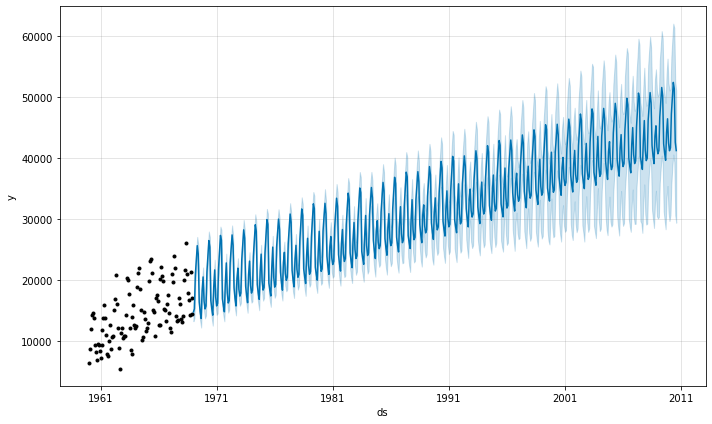

In [ ]:
import matplotlib.pyplot as plt
forcast =model.make_future_dataframe(periods=500,freq='M',include_history=False)
forcast=model.predict(forcast)
model.plot(forcast,xlabel='ds',ylabel='y')
plt.show()